Name: Saurabh S. Ramteke                                                       
Roll No: 21-27-19                                                               
M.Tech: Data Science

##### Objective: To study and apply image transformation using openCV package.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [7]:
image = cv2.imread(\
r"C:\Users\saura\Desktop\Ongoing\Notes\01.LAB_ass\Computer_vision_basics\Images\stock_picnic.jpg")

Dimensions: (4032, 3024, 3)


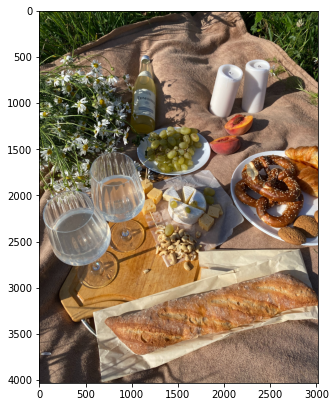

In [8]:
print(f'Dimensions: {image.shape}')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (5,10))
plt.imshow(image)
# cv2.imshow('', image_2)
# cv2.waitKey(0)

##### Transformation

There are two types of transformations: Affine & Non-Affine.   
Translation, resizing, and rotation are categorized as affine transformations of an image, and the warpAffine() function is used.
<div>
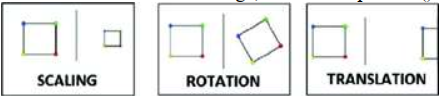
</div>
The nonaffine transformations are also called projective transformations. This type of
transformation does not preserve parallelism or length or angle of an image. 
<div>
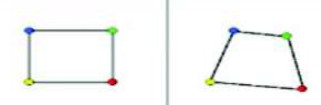
</div>

##### Translation

Transalation in x-Direction: 500
Transalation in y-Direction: 500


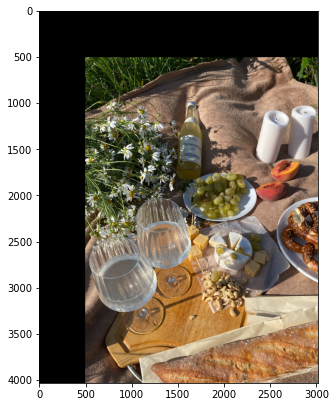

In [9]:
tx = int(input('Transalation in x-Direction: '))
ty = int(input('Transalation in y-Direction: '))

T = np.float32([[1,0,tx],[0, 1, ty]]) # transformation matrix

image2 = np.copy(image)
rows, cols = image2.shape[ : -1] # (all tuples excluding last one - channel color)

image_translated = cv2.warpAffine(image2, T, (cols, rows))

plt.figure(figsize = (5,10))
plt.imshow(image_translated)
# cv2.imshow('', image_translated)
# cv2.waitKey(0)

##### Rotation

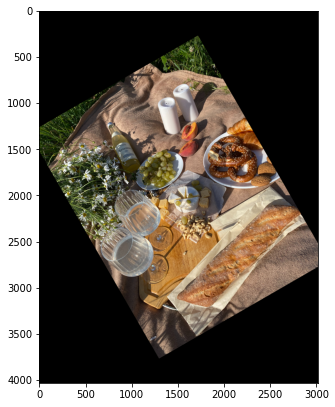

In [10]:
theta = 30

# Rotation matrix
# alpha = math.cos(theta)
# beta  = math.sin(theta)
# R = np.float32([[alpha, -beta, 0 ],[beta, alpha, 0]]) 

image3 = np.copy(image)
rows, cols = image3.shape[ : -1]

translation_matrix = np.float32([[1, 0, int(0.5 * cols)], [0 ,1, int(0.5* rows)]]) 
# Rotation_matrix    = cv2.getRotationMatrix2D((cols,rows), theta, 1)
Rotation_matrix    = cv2.getRotationMatrix2D((((cols-1)/2.0,(rows-1)/2.0)),theta,0.7)
img_translated     = cv2.warpAffine(image3, translation_matrix, (cols,rows))
img_rotated        = cv2.warpAffine(image3, Rotation_matrix, (cols,rows))

plt.figure(figsize=(5,10))
plt.imshow(img_rotated)

##### Image Scaling

If we are enlarging the image, we should prefer to use INTER_LINEAR or INTER_CUBIC interpolation.             
If we are shrinking the image, we should prefer to use INTER_AREA interpolation.

Cubic interpolation is computationally more complex, and hence slower than linear interpolation. However, the quality of the resulting image will be higher

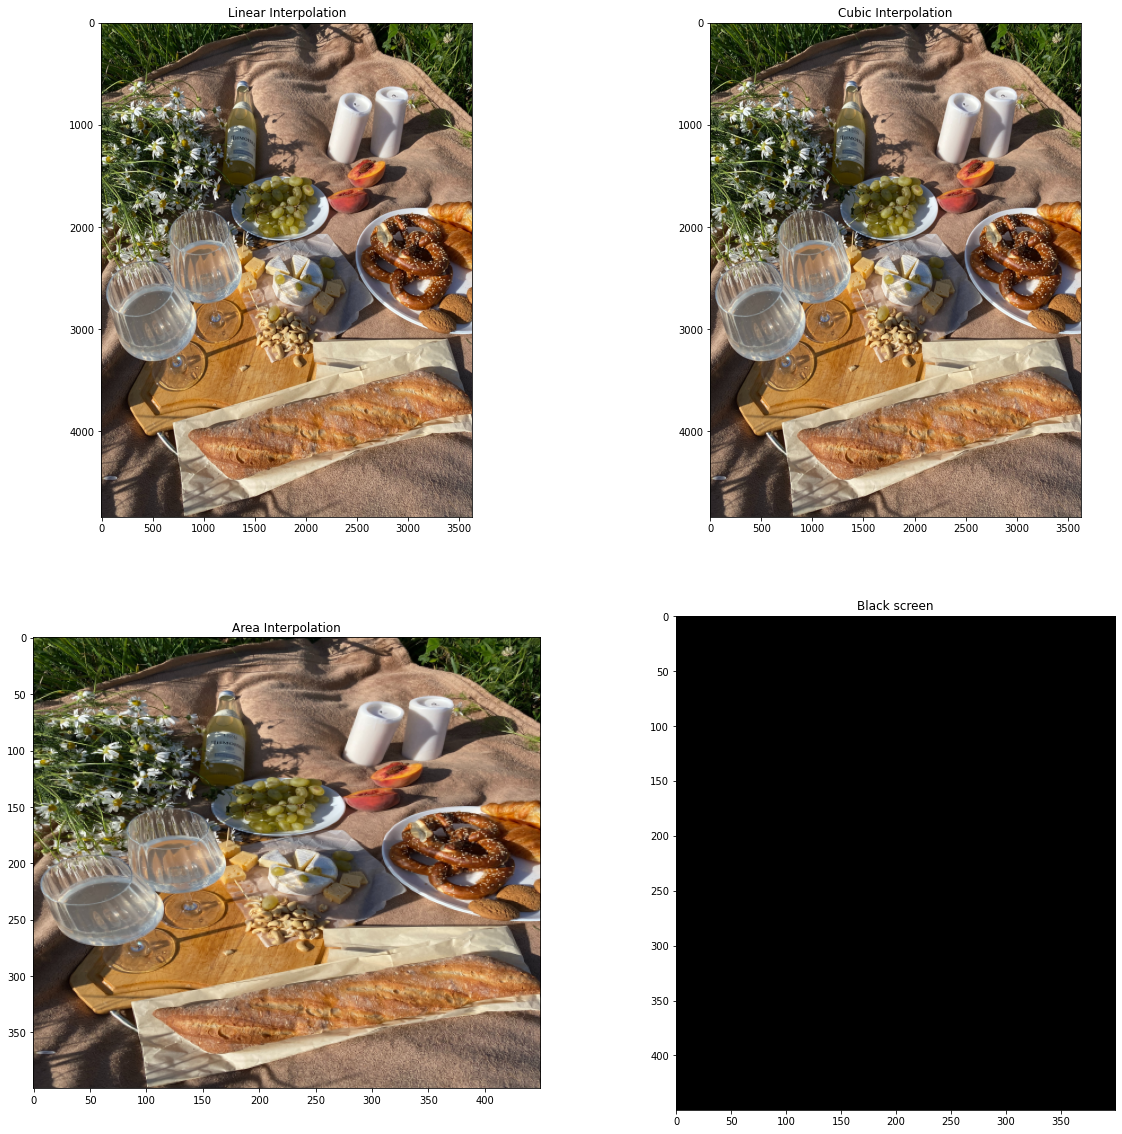

In [26]:
image4 = np.copy(image)
img_scaled_Linear = cv2.resize(image4,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_LINEAR)
img_scaled_cubic  = cv2.resize(image4,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)
img_scaled_Area   = cv2.resize(image4,(450, 400), interpolation = cv2.INTER_AREA)
black = np.zeros([450,400,3])

figure, ax = plt.subplots(2,2, figsize = (20, 20))
ax[0,0].set_title('Linear Interpolation')
ax[0,1].set_title('Cubic Interpolation')
ax[1,0].set_title('Area Interpolation')
ax[1,1].set_title('Black screen')

ax[0,0].imshow(img_scaled_Linear)
ax[0,1].imshow(img_scaled_cubic)
ax[1,0].imshow(img_scaled_Area)
ax[1,1].imshow(black)